# A* Pathfinding Algorithm Comparison

The following file compares 4 different A* algorithms outlined in the paper linked [here](https://pmc.ncbi.nlm.nih.gov/articles/PMC11888910/#sec1).

1. 4-directional A*  
2. 8-directional A*  
3. 16-directional A*  
4. 16-directional A* (optimized with bidirectional + dynamic weighting + redundant waypoint deletion)



In [1]:
import time
import math
from typing import List, Tuple, Optional

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astar_4directional import astar_4dir
from astar_8directional import astar_8dir
from astar_16directional import astar_16dir
from astar_16directional_optimized import astar_16dir_optimized

Coord = Tuple[int, int]


## Functions for Metrics & Visualization

In [2]:
def euclidean(a: Coord, b: Coord) -> float:
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


def path_length(path: Optional[List[Coord]]) -> float:
    if not path or len(path) < 2:
        return 0.0
    total = 0.0
    for i in range(1, len(path)):
        total += euclidean(path[i - 1], path[i])
    return total


def plot(grid: List[List[int]], path: Optional[List[Coord]] = None, start: Optional[Coord] = None, goal: Optional[Coord] = None, title: str = ""):
    grid_np = np.array(grid)
    plt.figure(figsize=(5, 5))
    plt.imshow(grid_np, cmap="Greys", origin="upper")

    if path:
        y = [r for (r, c) in path]
        x = [c for (r, c) in path]
        plt.plot(x, y, linewidth=2, marker="o", markersize=3)

    if start:
        plt.scatter(start[1], start[0], marker="s", s=80, edgecolors="green", facecolors="none", linewidths=2, label="Start")
    if goal:
        plt.scatter(goal[1], goal[0], marker="X", s=100, edgecolors="red", facecolors="none", linewidths=2, label="Goal")

    plt.title(title)
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.gca().invert_yaxis()
    if start or goal:
        plt.legend(loc="upper right")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


def metrics(alg_name: str, alg_fn, grid, start, goal):
    t0 = time.perf_counter()
    path = alg_fn(grid, start, goal)
    t1 = time.perf_counter()
    elapsed = t1 - t0
    n_points = len(path) if path else 0
    length = path_length(path)
    return path, elapsed, n_points, length


## Test Grids

In [3]:
grid1 = [
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
start1 = (0, 0)
goal1 = (19, 19)


grid2 = [
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
start2 = (0, 0)
goal2 = (19, 19)


grid3 = [
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1],
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
]
start3 = (10, 2)
goal3 = (10, 15)


print("grids defined")


grids defined


## Grid 1

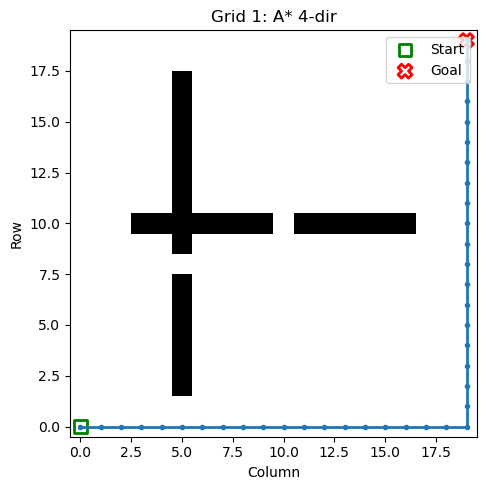

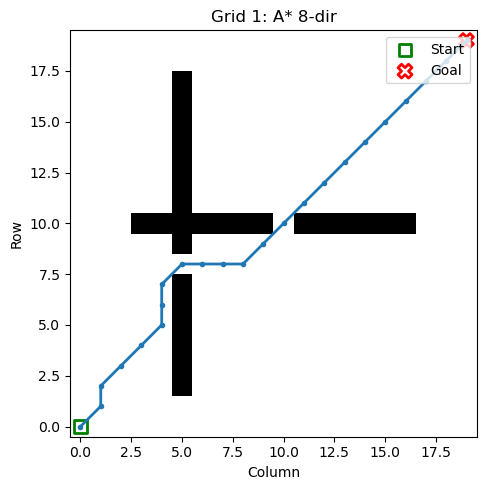

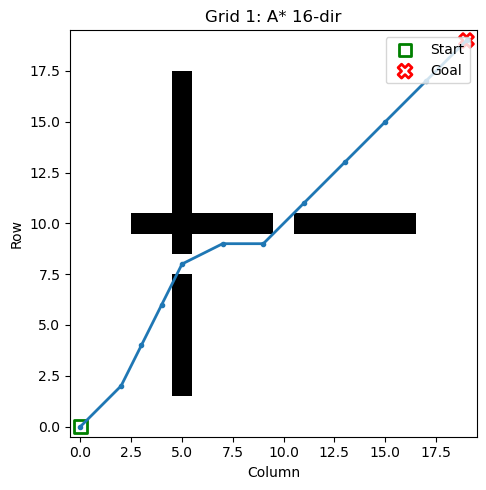

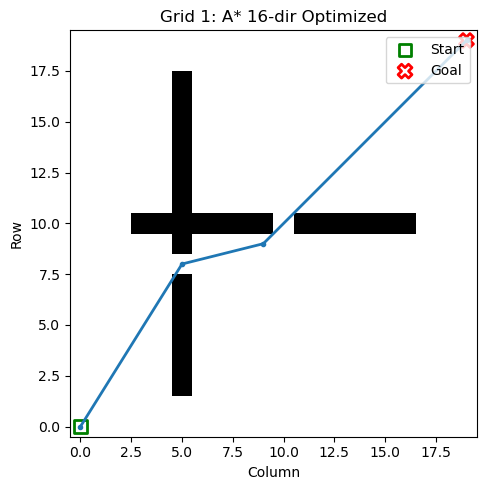

,Algorithm,Time(s),# of Path Points,Path Length
0,A* 4-dir,0.001516,39,38.000000
1,A* 8-dir,0.000266,23,28.627417
2,A* 16-dir,0.001857,12,27.914835
3,A* 16-dir Optimized,0.000698,4,27.699222


In [4]:
grid1_results = []

algorithms = [("A* 4-dir", astar_4dir), ("A* 8-dir", astar_8dir), ("A* 16-dir", astar_16dir), ("A* 16-dir Optimized", astar_16dir_optimized)]

for algorithm_name, algorithm in algorithms:
    path, elapsed, num_points, length = metrics(algorithm_name, algorithm, grid1, start1, goal1)
    plot(grid1, path, start1, goal1, title=f"Grid 1: {algorithm_name}")
    grid1_results.append({"Algorithm": algorithm_name, "Time(s)": elapsed, "# of Path Points": num_points, "Path Length": length})

grid1_table = pd.DataFrame(grid1_results)
grid1_table


## Grid 2

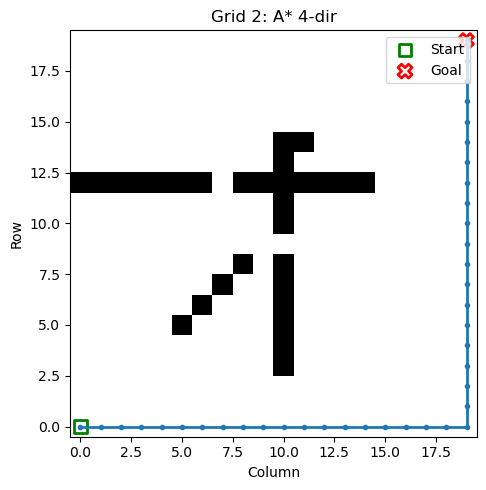

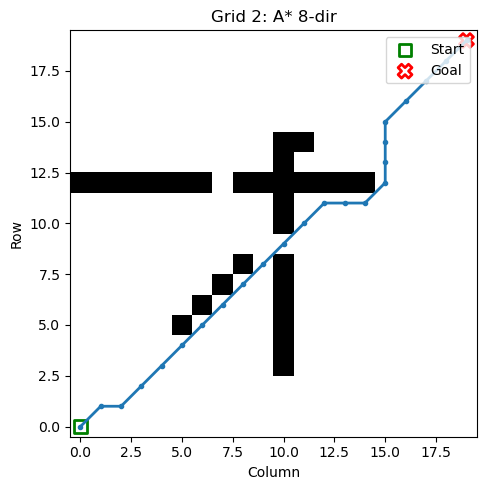

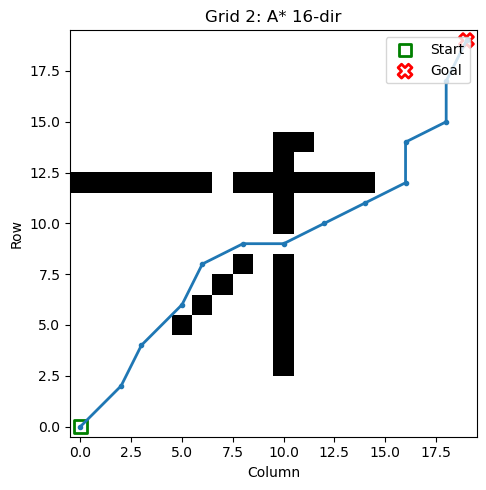

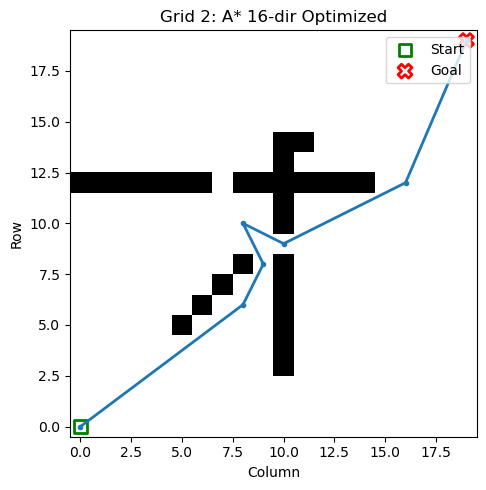

,Algorithm,Time(s),# of Path Points,Path Length
0,A* 4-dir,0.001328,39,38.000000
1,A* 8-dir,0.000446,23,28.627417
2,A* 16-dir,0.003801,14,29.545398
3,A* 16-dir Optimized,0.001290,7,31.032181


In [5]:
grid2_results = []

algorithms = [("A* 4-dir", astar_4dir), ("A* 8-dir", astar_8dir), ("A* 16-dir", astar_16dir), ("A* 16-dir Optimized", astar_16dir_optimized)]

for algorithm_name, algorithm in algorithms:
    path, elapsed, num_points, length = metrics(algorithm_name, algorithm, grid2, start2, goal2)
    plot(grid2, path, start2, goal2, title=f"Grid 2: {algorithm_name}")
    grid2_results.append({"Algorithm": algorithm_name, "Time(s)": elapsed, "# of Path Points": num_points, "Path Length": length})

grid2_table = pd.DataFrame(grid2_results)
grid2_table


## Grid 3

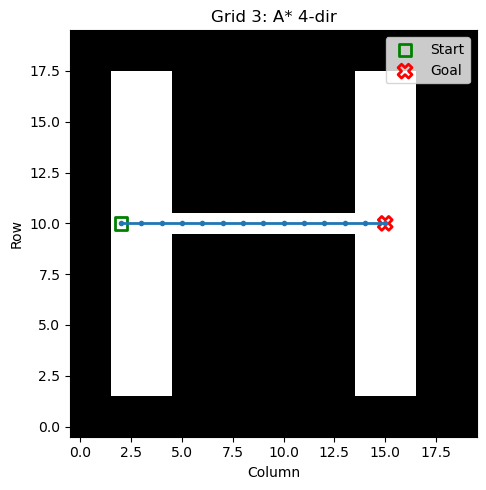

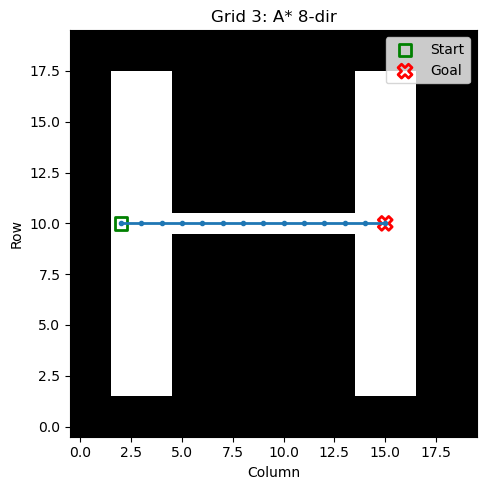

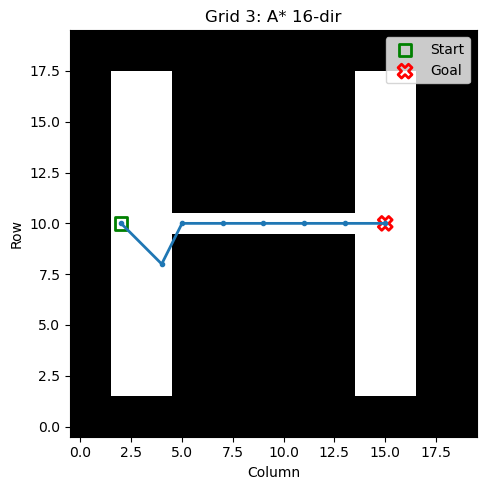

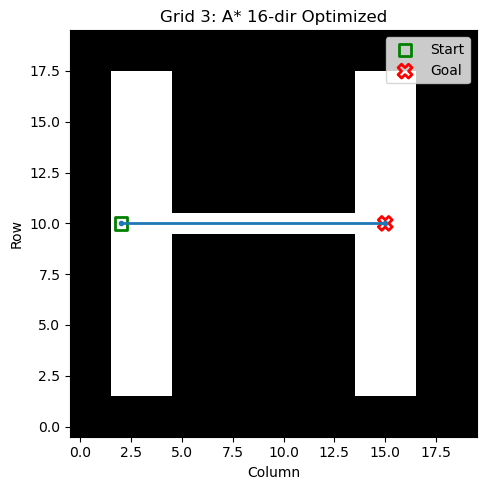

,Algorithm,Time(s),# of Path Points,Path Length
0,A* 4-dir,0.000116,14,13.000000
1,A* 8-dir,0.000084,14,13.000000
2,A* 16-dir,0.000653,8,15.064495
3,A* 16-dir Optimized,0.000736,2,13.000000


In [6]:
grid3_results = []

algorithms = [("A* 4-dir", astar_4dir), ("A* 8-dir", astar_8dir), ("A* 16-dir", astar_16dir), ("A* 16-dir Optimized", astar_16dir_optimized)]

for algorithm_name, algorithm in algorithms:
    path, elapsed, num_points, length = metrics(algorithm_name, algorithm, grid3, start3, goal3)
    plot(grid3, path, start3, goal3, title=f"Grid 3: {algorithm_name}")
    grid3_results.append({"Algorithm": algorithm_name, "Time(s)": elapsed, "# of Path Points": num_points, "Path Length": length})

grid3_table = pd.DataFrame(grid3_results)
grid3_table
